In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ALGORITHM PART - 1

In [74]:
inputfish = cv2.imread("fishy.png")

In [75]:
inputrgb = cv2.cvtColor(inputfish, cv2.COLOR_BGR2RGB)

In [76]:
inputfish.shape

(175, 348, 3)

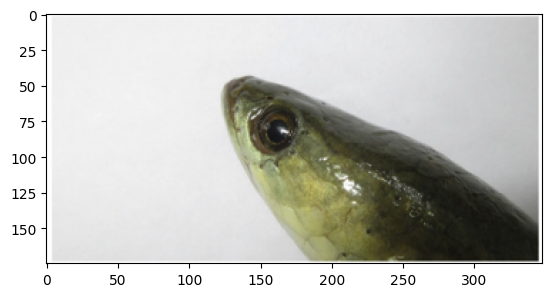

In [77]:
plt.imshow(inputrgb)

RGB to CMYK Transformation

In [78]:
imagecmyk = inputrgb.astype(np.float64)/255.
K = 1 - np.max(inputrgb, axis=2)
C = (1-inputrgb[...,2] - K)/(1-K)
M = (1-inputrgb[...,1] - K)/(1-K)
Y = (1-inputrgb[...,0] - K)/(1-K)

imgcmyk= (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

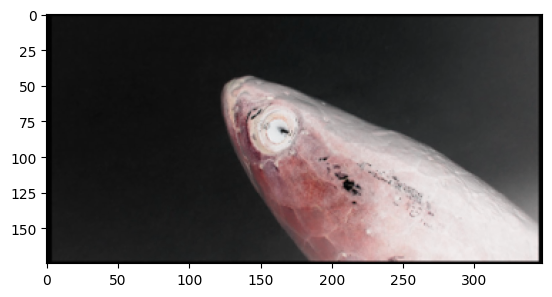

In [79]:
plt.imshow(imgcmyk)

C - Channel

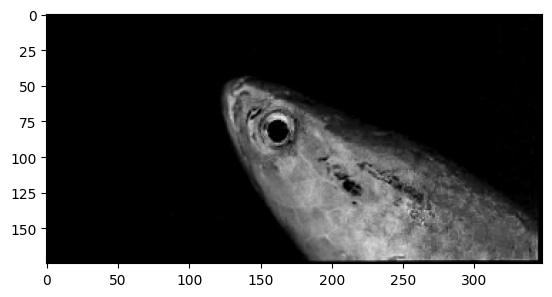

In [80]:
plt.imshow(C, cmap='gray')

Subtraction of Statistical Paramter

In [81]:
Inew = C - np.mean(C) - np.std(C)

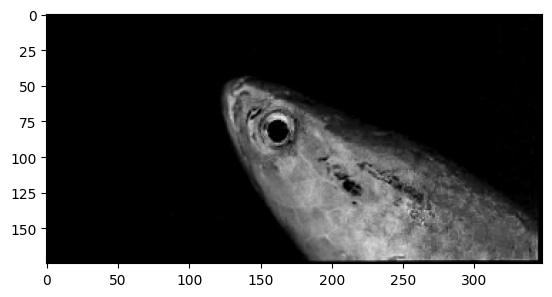

In [82]:
plt.imshow(Inew,cmap='gray')

Circular Hough Transform

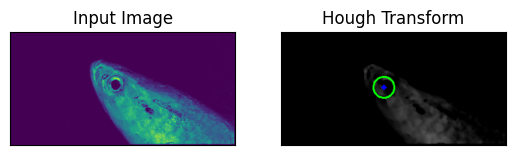

In [83]:
bgr_img = Inew


if bgr_img.shape[-1] == 3:           # color image
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img
    rgb_img = gray_img

gray_img = gray_img.astype('float32')
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

final_im = cv2.normalize(src=img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

circles = cv2.HoughCircles(final_im,cv2.HOUGH_GRADIENT,1,20,param1=180,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    img = cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    img = cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()


In [84]:
cimg.shape

(175, 348, 3)

Binarizing the pre-processed image and selecting the ROI

In [85]:
w1 = 1
w2 = 4
ThROI = w1*np.std(cimg) + w2*np.mean(cimg)

In [86]:
print(ThROI)

12.505119919776917


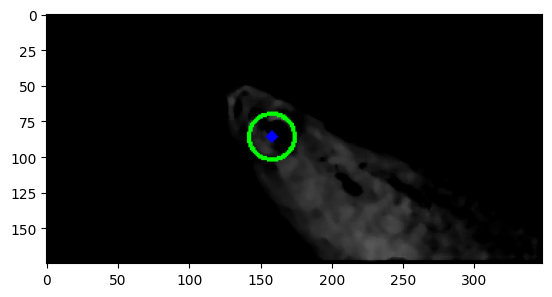

In [87]:
plt.imshow(cimg)

In [88]:
img2 = cv2.cvtColor(inputrgb,cv2.COLOR_RGB2GRAY)

In [89]:
img2.shape

(175, 348)

In [90]:
img2 = img2.astype('uint8')

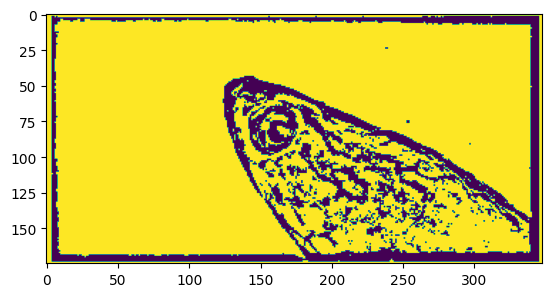

In [91]:
thresh1 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 13 , 5)
plt.imshow(thresh1)

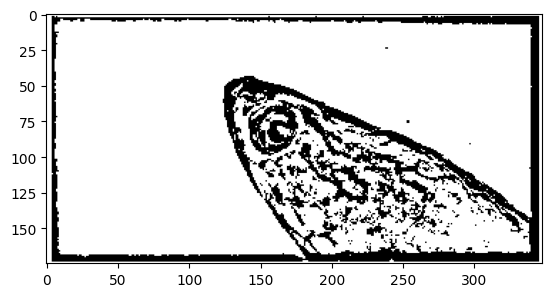

In [92]:
image_copy = np.copy(thresh1)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [93]:
# draw filled circle in white on black background as mask
xc = circles[0][0][0]
yc = circles[0][0][1]
radius = circles[0][0][2]
mask = np.zeros_like(image_copy)
mask1 = cv2.circle(mask, (xc,yc), radius, (255,255,255), -1)
#plt.imshow(mask1)

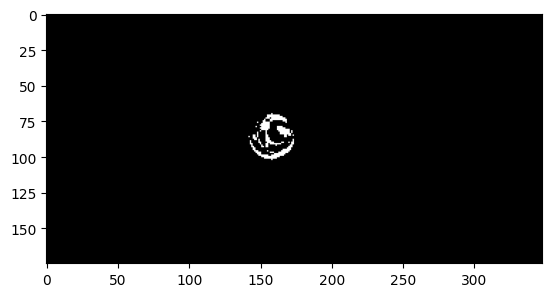

In [94]:
# apply mask to image
result = cv2.bitwise_and(image_copy, mask)
plt.imshow(result)

In [95]:
result = cv2.cvtColor(result,cv2.COLOR_RGB2BGR)
result = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)

In [96]:
result.shape

(175, 348)

Convex Hull




In [97]:
blur = cv2.blur(result, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

In [99]:
contours, hierarchy = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [100]:
# create hull array for convex hull points
hull = []
 
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

In [128]:
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
 
# draw contours and hull points
for i in range(len(contours)):
    color_contours = (255, 255, 255) # green - color for contours
    color = (255, 255, 255) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(drawing, contours, i, color_contours, 8, 8, hierarchy)
    # draw ith convex hull object
    # cv2.drawContours(drawing, hull, i, color, 1, 8)

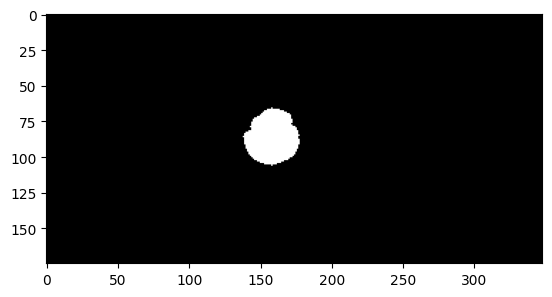

In [129]:
plt.imshow(drawing)

In [184]:
drawing.shape

(175, 348, 3)

Dialated image

In [130]:
kernel = np.ones((7, 7), np.uint8)

dilated_img = cv2.dilate(drawing, kernel, iterations=1)


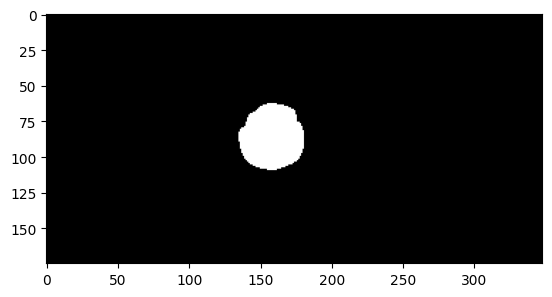

In [131]:
plt.imshow(dilated_img)

Eroded image

In [132]:
kernel = np.ones((7,7), np.uint8)
eroded_image = cv2.erode(drawing, kernel)

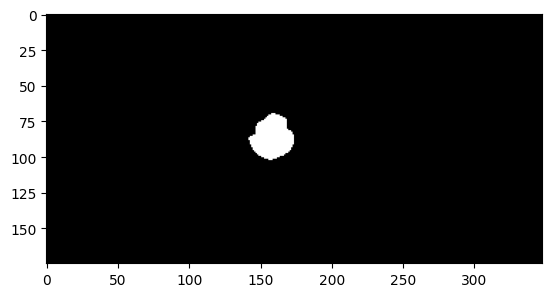

In [133]:
plt.imshow(eroded_image)

Circular rim

In [134]:
cir_rim = dilated_img - eroded_image

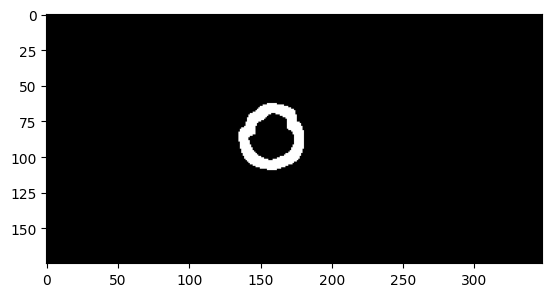

In [135]:
plt.imshow(cir_rim)

# ALGORITHM - PART 2

In [137]:
inputfish2 = cv2.imread("fishy.png")

In [138]:
inputrgb2 = cv2.cvtColor(inputfish2, cv2.COLOR_BGR2RGB)

In [139]:
inputfish2.shape

(175, 348, 3)

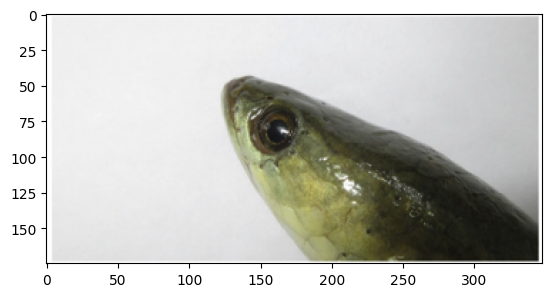

In [140]:
plt.imshow(inputrgb2)

RGB to HSV Transformation

In [141]:
hsv_img = cv2.cvtColor(inputrgb2, cv2.COLOR_RGB2HSV)

S Channel

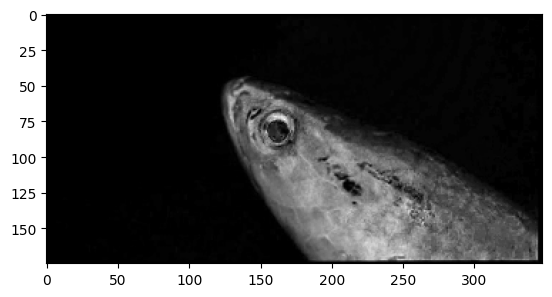

In [153]:
h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
plt.imshow(s, cmap='gray')

In [146]:
s.shape

(175, 348)

Circular rim in s channel

In [147]:
cir_rim = cv2.cvtColor(cir_rim, cv2.COLOR_BGR2GRAY)

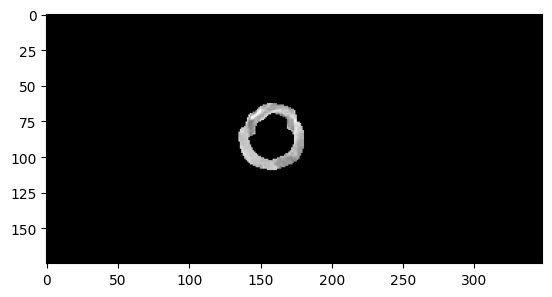

In [155]:
sub = s * cir_rim
plt.imshow(sub, cmap='gray')

Intensity based thresholding

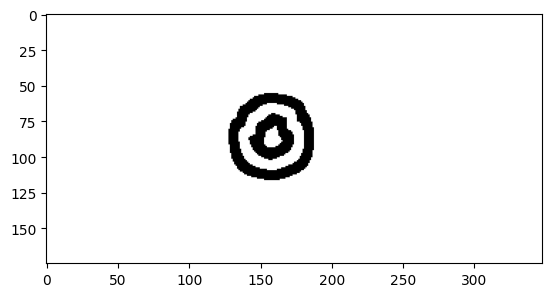

In [181]:
thresh2 = cv2.adaptiveThreshold(sub, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 15, 5)
plt.imshow(thresh2, cmap='gray')

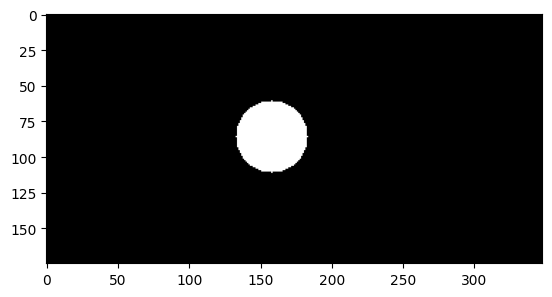

In [207]:
mask2 = np.zeros_like(thresh2)
radius = 25
mask3 = cv2.circle(mask2, (xc,yc), radius, (255,255,255), -1)
plt.imshow(mask3, cmap='gray')

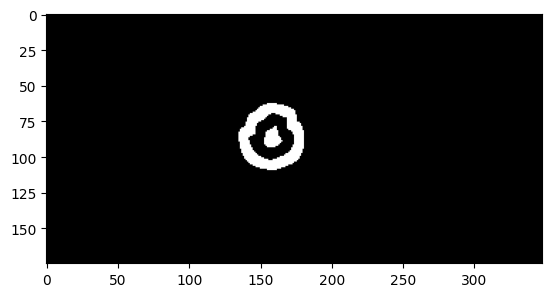

In [208]:
resultmask = cv2.bitwise_and(thresh2, mask3)
plt.imshow(resultmask, cmap='gray')

Boundary detection of ROI Segmented

In [185]:

# Convert to graycsale
img_gray = cv2.cvtColor(drawing, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection


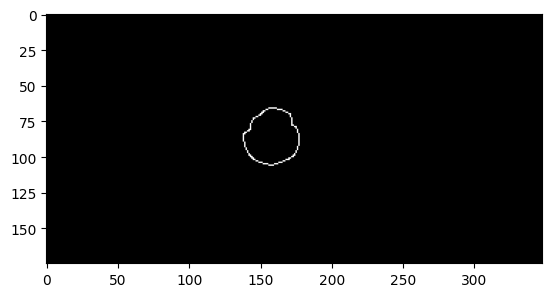

In [186]:
plt.imshow(edges, cmap='gray')

Elementwise multiplcation

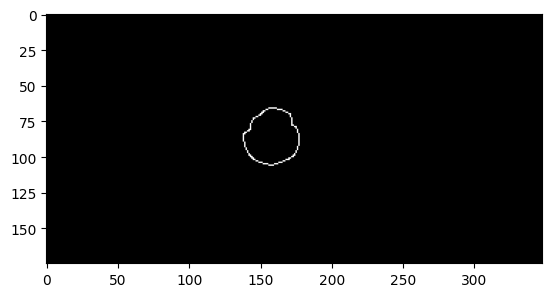

In [211]:
conv = edges * resultmask
plt.imshow(conv, cmap='gray')

Angle = Arc length/circumference

In [216]:
n_white_pix_circumference = np.sum(edges != 0)
n_white_pix_arc = np.sum(conv != 0)

In [217]:
n_white_pix_arc

127

In [220]:
angle = (n_white_pix_arc/n_white_pix_circumference)*360
print(angle)

360.0


Classification

In [221]:
if angle>125:
  print("Fish exposed to mercury")
else:
  print("Healthy fish")
  

Fish exposed to mercury
